In [22]:
import pandas as pd

In [23]:
data = pd.read_csv('/content/bank.csv',sep=';')

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [25]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [27]:
encoded=pd.get_dummies(data,drop_first=True)
encoded

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4517,57,-3313,9,153,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4518,57,295,19,151,11,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4519,28,1137,6,129,4,211,3,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X = encoded.drop('y_yes',axis=1)
y = encoded['y_yes']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier()

In [35]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred=model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
accuracy_score(y_test,y_pred)

0.8629329403095063

In [42]:
confusion_matrix(y_test,y_pred)

array([[1100,  102],
       [  84,   71]])

In [43]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       False       0.93      0.92      0.92      1202\n        True       0.41      0.46      0.43       155\n\n    accuracy                           0.86      1357\n   macro avg       0.67      0.69      0.68      1357\nweighted avg       0.87      0.86      0.87      1357\n'

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

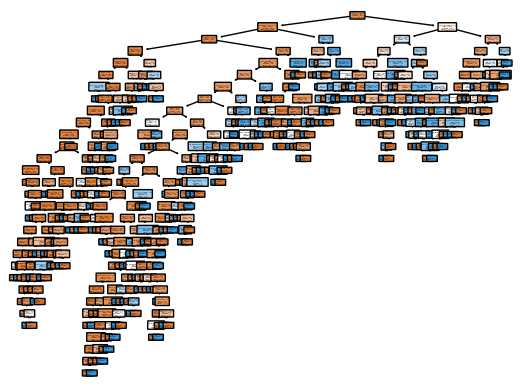

In [45]:
plot_tree(model,filled=True,feature_names=X.columns,class_names=['No','Yes'],rounded=True)
plt.show()